In [5]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *

box_DIR = "../data/misc/"
fig_DIR = "../figs/analysis/"

In [6]:
from plotnine import geom_histogram, after_stat, stat_bin, geom_col, scale_fill_brewer,scale_fill_discrete, position_stack
from mizani.formatters import percent_format

## Team Contracts Bar

### 2023

In [2]:
c0 = 136_021_000	
c1 = 165_294_000	
c2 = 172_346_000	
c3 = 182_794_000

ml = 12_405_000

In [4]:
df = pd.read_csv(box_DIR + "contracts_2023.csv")
df["2023-24"] = df["2023-24"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2024-25"] = df["2024-25"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2025-26"] = df["2025-26"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2026-27"] = df["2026-27"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2027-28"] = df["2027-28"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2028-29"] = df["2028-29"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2023-24-c"] = df["2023-24"]/c0
df = df.sort_values(["Tm","2023-24"],ascending=False).reset_index(drop=True)

In [5]:
dfg1 = df.groupby("Tm")
keys = list(dfg1.groups)
dfg = []
tsals = []
for key in keys:
    dfg2 = dfg1.get_group(key)
    dfg3= dfg2.reset_index(drop=True).reset_index()
    dfg.append(dfg3)
    tsals.append(dfg3["2023-24"].sum())
dfg = pd.concat(dfg)
dfg["index"] = dfg["index"].astype("category")
dft = pd.DataFrame({"team":keys,"sals":tsals})
tcat = dft.sort_values("sals",ascending=False)["team"].to_list()
tcat.reverse()
dfg["Tm"] = pd.Categorical(dfg["Tm"] , categories=tcat)

In [ ]:
p = (
    ggplot(dfg)
    + aes(x="Tm",y="2023-24-c",fill="index")
    + geom_col(show_legend=False, position=position_stack(reverse=True),color="white")
    + scale_y_continuous(labels=percent_format(),breaks=np.arange(0,1.6,0.25))
    + scale_fill_discrete(l=0.5, h=0.01)
    + geom_hline(yintercept = 0.5, color = "black", linetype="dashed")
    + geom_hline(yintercept = 0.75, color = "black", linetype="dashed")
    + geom_hline(yintercept = 1, color = "black", linetype="dashed")
    + geom_hline(yintercept = c1/c0, color = "black", linetype="dashed")
    + geom_hline(yintercept = c2/c0, color = "black", linetype="dashed")
    + geom_hline(yintercept = c3/c0, color = "black", linetype="dashed")
    + coord_flip()
    + annotate("text", x=1, y=1.0, label="Cap",ha='left')
    + annotate("text", x=2, y=c1/c0, label="Luxury Tax",ha='left')
    + annotate("text", x=3, y=c2/c0, label="1st Apron",ha='left')
    + annotate("text", x=4, y=c3/c0, label="2nd Apron",ha='left')
    + theme_idv
    + labs(
        y="Salary as % of Cap",
        x="Team",
        title="NBA 2023-24 Salary",
        caption="@SravanNBA | source: basketballrefence",
    )
    + theme(
        figure_size=(8,12),
        axis_text_y=element_text(size=14),
        axis_text_x=element_text(size=12),
        axis_title_x=element_text(size=16),
        plot_title=element_text(size=20),
    )
)
p.save(fig_DIR + "salary_col.png", verbose=False,dpi=300)
p

In [ ]:
df1 = df[df["2023-24-c"]>=0.20]

In [ ]:
df.sort_values("Rk").iloc[:20,:]

In [ ]:
p = (
    ggplot(df1)
    + aes(x="2023-24-c")
    + geom_histogram(color="#F0F0F0",size=1,closed="left", breaks=[0.20,0.25,0.30,0.35,0.40])
    + stat_bin(aes(label=after_stat('count')), closed="left", breaks=[0.20,0.25,0.30,0.35,0.40], geom="text",nudge_y=1,format_string ="{:0.0f}")
    + scale_x_continuous(labels=percent_format(),breaks=np.arange(0,0.45,0.05))
    # + scale_y_continuous(breaks=np.arange(0,11,1))
    + theme_idv
    + labs(
        y="Salary as % of Cap",
        x="Team",
        title="NBA 2023-24 Salary Histogram",
        caption="@SravanNBA | source: basketballrefence",
    )
)
p.save(fig_DIR + "salary_histogram.png",dpi=300)
p

### 2024

In [7]:
c0 = 140_588_000
c1 = 170_814_000	
c2 = 178_132_000	
c3 = 188_931_000


ml = 12_822_000

In [11]:
df = pd.read_csv(box_DIR + "contracts_2024.csv")
df["2024-25"] = df["2024-25"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2025-26"] = df["2025-26"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2026-27"] = df["2026-27"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2027-28"] = df["2027-28"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2028-29"] = df["2028-29"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2029-30"] = df["2029-30"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2024-25-c"] = df["2024-25"]/c0
df = df.sort_values(["Tm","2024-25"],ascending=False).reset_index(drop=True)

In [12]:
dfg1 = df.groupby("Tm")
keys = list(dfg1.groups)
dfg = []
tsals = []
for key in keys:
    dfg2 = dfg1.get_group(key)
    dfg3= dfg2.reset_index(drop=True).reset_index()
    dfg.append(dfg3)
    tsals.append(dfg3["2024-25"].sum())
dfg = pd.concat(dfg)
dfg["index"] = dfg["index"].astype("category")
dft = pd.DataFrame({"team":keys,"sals":tsals})
tcat = dft.sort_values("sals",ascending=False)["team"].to_list()
tcat.reverse()
dfg["Tm"] = pd.Categorical(dfg["Tm"] , categories=tcat)

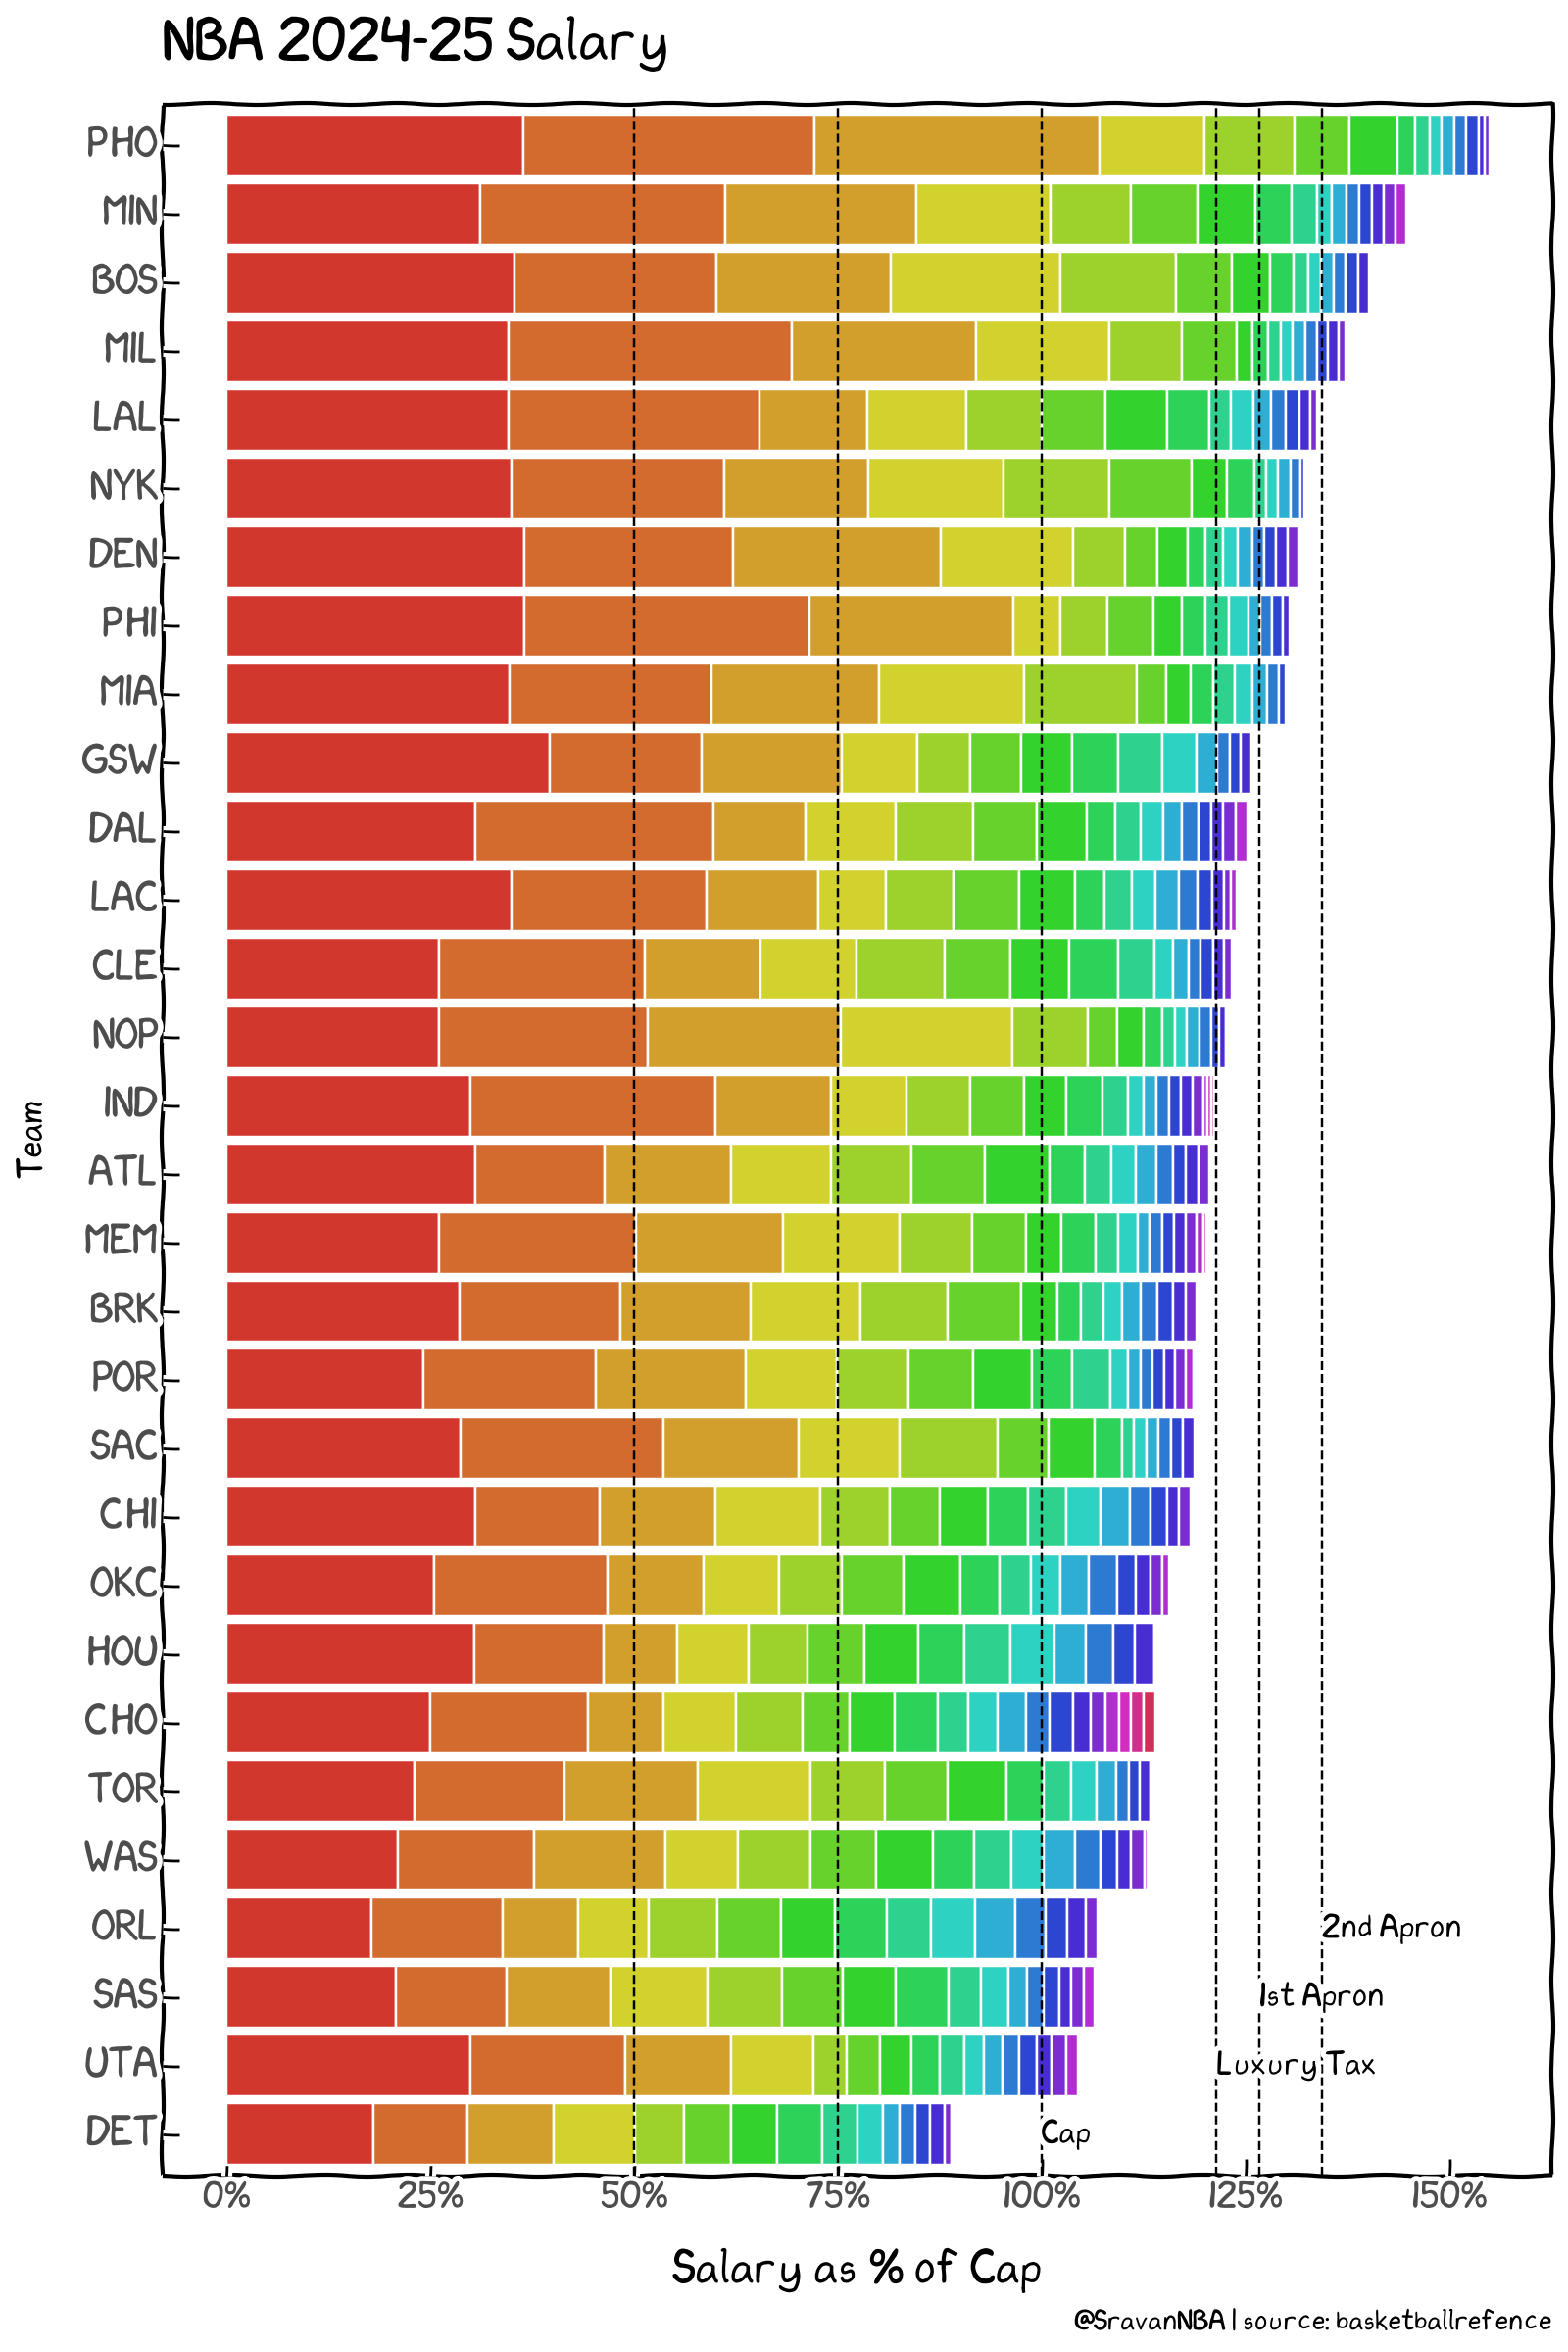

<Figure Size: (800 x 1200)>

In [15]:
p = (
    ggplot(dfg)
    + aes(x="Tm",y="2024-25-c",fill="index")
    + geom_col(show_legend=False, position=position_stack(reverse=True),color="white")
    + scale_y_continuous(labels=percent_format(),breaks=np.arange(0,1.6,0.25))
    + scale_fill_discrete(l=0.5, h=0.01)
    + geom_hline(yintercept = 0.5, color = "black", linetype="dashed")
    + geom_hline(yintercept = 0.75, color = "black", linetype="dashed")
    + geom_hline(yintercept = 1, color = "black", linetype="dashed")
    + geom_hline(yintercept = c1/c0, color = "black", linetype="dashed")
    + geom_hline(yintercept = c2/c0, color = "black", linetype="dashed")
    + geom_hline(yintercept = c3/c0, color = "black", linetype="dashed")
    + coord_flip()
    + annotate("text", x=1, y=1.0, label="Cap",ha='left')
    + annotate("text", x=2, y=c1/c0, label="Luxury Tax",ha='left')
    + annotate("text", x=3, y=c2/c0, label="1st Apron",ha='left')
    + annotate("text", x=4, y=c3/c0, label="2nd Apron",ha='left')
    + theme_idv
    + labs(
        y="Salary as % of Cap",
        x="Team",
        title="NBA 2024-25 Salary",
        caption="@SravanNBA | source: basketballrefence",
    )
    + theme(
        figure_size=(8,12),
        axis_text_y=element_text(size=14),
        axis_text_x=element_text(size=12),
        axis_title_x=element_text(size=16),
        plot_title=element_text(size=20),
    )
)
p.save(fig_DIR + "salary_col_2024.png", verbose=False,dpi=300)
p

## Average Starter Contract

In [4]:
c0 = 140_588_000	

In [6]:
df = pd.read_csv(box_DIR + "contracts_2024.csv")
df["2024-25"] = df["2024-25"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2025-26"] = df["2025-26"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2026-27"] = df["2026-27"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2027-28"] = df["2027-28"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2028-29"] = df["2028-29"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2029-30"] = df["2029-30"].str.replace("$","").astype(float).fillna(0).astype(int)
df["2024-25-c"] = df["2024-25"]/c0
df = df.sort_values(["Tm","2024-25"],ascending=False).reset_index(drop=True)

In [23]:
teams_list = df["Tm"].unique()

In [24]:
teams_list

array(['WAS', 'UTA', 'TOR', 'SAS', 'SAC', 'POR', 'PHO', 'PHI', 'ORL',
       'OKC', 'NYK', 'NOP', 'MIN', 'MIL', 'MIA', 'MEM', 'LAL', 'LAC',
       'IND', 'HOU', 'GSW', 'DET', 'DEN', 'DAL', 'CLE', 'CHO', 'CHI',
       'BRK', 'BOS', 'ATL'], dtype=object)

In [8]:
df1 = df.groupby("Tm")
df1_1 = df1.nth(0)
df1_2 = df1.nth(1)
df1_3 = df1.nth(2)
df1_4 = df1.nth(3)
df1_5 = df1.nth(4)

In [20]:
m = np.zeros(5)
m[0]  = df1_1["2024-25"].mean()
m[1]  = df1_2["2024-25"].mean()
m[2]  = df1_3["2024-25"].mean()
m[3]  = df1_4["2024-25"].mean()
m[4]  = df1_5["2024-25"].mean()

In [22]:
np.mean(m)

25550256.24

In [21]:
for i in range(5):
    print(m[i])

41407147.6
32453956.6
23690378.333333332
17458238.633333333
12741560.033333333


In [26]:
winning_teams = ['SAS', 'PHO',  'ORL',
       'OKC', 'NYK', 'MIN', 'MIL', 'MIA', 'MEM', 'LAL', 'LAC',
       'IND', 'HOU', 'GSW', 'DEN', 'DAL', 'CLE',
       'BOS', 'ATL']

In [31]:
len(winning_teams)

19

In [27]:
df2 = df[df["Tm"].isin(winning_teams)]
df1 = df2.groupby("Tm")
df1_1 = df1.nth(0)
df1_2 = df1.nth(1)
df1_3 = df1.nth(2)
df1_4 = df1.nth(3)
df1_5 = df1.nth(4)

In [28]:
m = np.zeros(5)
m[0]  = df1_1["2024-25"].mean()
m[1]  = df1_2["2024-25"].mean()
m[2]  = df1_3["2024-25"].mean()
m[3]  = df1_4["2024-25"].mean()
m[4]  = df1_5["2024-25"].mean()

In [29]:
np.mean(m)

26766212.957894735

In [30]:
for i in range(5):
    print(m[i])

43755608.94736842
34502032.78947368
24134890.0
18062207.47368421
13376325.578947369
